<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-load" data-toc-modified-id="Data-load-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data load</a></span><ul class="toc-item"><li><span><a href="#data-preprocessing" data-toc-modified-id="data-preprocessing-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>data preprocessing</a></span></li></ul></li><li><span><a href="#단어장(vocabulary)만들기" data-toc-modified-id="단어장(vocabulary)만들기-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>단어장(vocabulary)만들기</a></span><ul class="toc-item"><li><span><a href="#tokenizing(eng)---input_text" data-toc-modified-id="tokenizing(eng)---input_text-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>tokenizing(eng) - input_text</a></span></li><li><span><a href="#tokenizing(fra)-target_text" data-toc-modified-id="tokenizing(fra)-target_text-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>tokenizing(fra)-target_text</a></span></li><li><span><a href="#단어장의-크기를-변수로-저장" data-toc-modified-id="단어장의-크기를-변수로-저장-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>단어장의 크기를 변수로 저장</a></span></li><li><span><a href="#데이터의-최대-길이" data-toc-modified-id="데이터의-최대-길이-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>데이터의 최대 길이</a></span></li><li><span><a href="#encoder_input-/-decoder_input-&amp;-_target-:-Teaching-force" data-toc-modified-id="encoder_input-/-decoder_input-&amp;-_target-:-Teaching-force-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>encoder_input / decoder_input &amp; _target : Teaching force</a></span></li><li><span><a href="#padding-진행" data-toc-modified-id="padding-진행-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>padding 진행</a></span></li></ul></li><li><span><a href="#Validation-set" data-toc-modified-id="Validation-set-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Validation set</a></span></li><li><span><a href="#번역기-모델-훈련" data-toc-modified-id="번역기-모델-훈련-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>번역기 모델 훈련</a></span><ul class="toc-item"><li><span><a href="#함수형-API모델-설계" data-toc-modified-id="함수형-API모델-설계-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>함수형 API모델 설계</a></span><ul class="toc-item"><li><span><a href="#인코더-설계" data-toc-modified-id="인코더-설계-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>인코더 설계</a></span></li><li><span><a href="#디코더-입력층-설계" data-toc-modified-id="디코더-입력층-설계-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>디코더 입력층 설계</a></span></li><li><span><a href="#디코더-출력층-설계" data-toc-modified-id="디코더-출력층-설계-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>디코더 출력층 설계</a></span></li></ul></li><li><span><a href="#모델생성" data-toc-modified-id="모델생성-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>모델생성</a></span></li><li><span><a href="#모델-훈련" data-toc-modified-id="모델-훈련-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>모델 훈련</a></span></li></ul></li><li><span><a href="#번역기-테스트" data-toc-modified-id="번역기-테스트-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>번역기 테스트</a></span><ul class="toc-item"><li><span><a href="#디코더-입력층-설계" data-toc-modified-id="디코더-입력층-설계-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>디코더 입력층 설계</a></span></li><li><span><a href="#디코더-출력층-재설계" data-toc-modified-id="디코더-출력층-재설계-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>디코더 출력층 재설계</a></span></li><li><span><a href="#디코더의결과를-넣을-사전-생성" data-toc-modified-id="디코더의결과를-넣을-사전-생성-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>디코더의결과를 넣을 사전 생성</a></span></li><li><span><a href="#예측-과정을-위한-함수-decode_sequence()를-구현" data-toc-modified-id="예측-과정을-위한-함수-decode_sequence()를-구현-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>예측 과정을 위한 함수 decode_sequence()를 구현</a></span></li><li><span><a href="#출력결과-테스트" data-toc-modified-id="출력결과-테스트-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>출력결과 테스트</a></span></li></ul></li><li><span><a href="#회고" data-toc-modified-id="회고-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>회고</a></span></li></ul></div>

In [1]:
import re
import os
import pandas as pd
import numpy as np


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical


# Data load

In [2]:
import os
file_path = os.getenv('HOME')+'/aiffel/translator_seq2seq/data/fra.txt'
lines = pd.read_csv(file_path, names=['eng', 'fra', 'cc'], sep='\t')
print('전체 샘플의 수 :',len(lines))
lines.sample(5) #샘플 5개 출력

전체 샘플의 수 : 197463


,eng,fra,cc
4462,Are you hurt?,Vous êtes-vous blessées ?,CC-BY 2.0 (France) Attribution: tatoeba.org #1...
13778,He's a freshman.,C'est un bizuth.,CC-BY 2.0 (France) Attribution: tatoeba.org #1...
16901,What's it about?,De quoi s'agit-il ?,CC-BY 2.0 (France) Attribution: tatoeba.org #1...
123043,I always wanted to go to Boston.,J'ai toujours voulu aller à Boston.,CC-BY 2.0 (France) Attribution: tatoeba.org #5...
35466,How are you feeling?,Comment vous sentez-vous ?,CC-BY 2.0 (France) Attribution: tatoeba.org #1...


In [3]:
#세번째 열은 불필요하므로 제거하고, 훈련 데이터는 3,3만개의 샘플로 줄이기
lines = lines[['eng', 'fra']][:33000] # 3만개 샘플 사용
lines.sample(5)

,eng,fra
1411,Seriously?,Sans blague ?
2310,Let's move.,Partons !
7944,Is it my turn?,C'est mon tour ?
12837,You seem upset.,Vous semblez contrariée.
8091,It's not fair.,Ce n'est pas équitable.


In [4]:
print(type(lines))
print(lines.shape)
lines.iloc[:10]

<class 'pandas.core.frame.DataFrame'>
(33000, 2)


,eng,fra
0,Go.,Va !
1,Go.,Marche.
2,Go.,En route !
3,Go.,Bouge !
4,Hi.,Salut !
5,Hi.,Salut.
6,Run!,Cours !
7,Run!,Courez !
8,Run!,Prenez vos jambes à vos cous !
9,Run!,File !


## data preprocessing

In [5]:
#re.sub(pattern[정규식], repl[치환할문자열], string[src문자열], count=0, flags=0)
# pattern 문자열에서 \ 문자를 사용하는 경우에는 혹시 모를 오류를 방지하기 위해 pattern을 raw string으로 변경

# 입력된 문장을
#     1. 소문자로 바꾸고, 양쪽 공백을 지웁니다
#     2. 특수문자 양쪽에 공백을 넣고
#     3. 여러개의 공백은 하나의 공백으로 바꿉니다
#     4. a-zA-Z?.!,¿가 아닌 모든 문자를 하나의 공백으로 바꿉니다
#     5. 다시 양쪽 공백을 지웁니다
#     6. 문장 시작에는 <sos>, 끝에는 <eos>를 추가합니다
#     7. 띄어쓰기 단위로 문장을 분리

def preprocess_sentence(sentence):
    sentence = sentence.lower().strip() #1
    sentence = re.sub(r"([?.!,¿])", r" \1 ", sentence) #2 
    sentence = re.sub(r'[" "]+', " ", sentence) #3
    sentence = re.sub(r"[^a-zA-Z?.!]+", " ", sentence) #4
    
    sentence = sentence.strip() #5
    sentence = sentence.split(" ") # 7
    
    return sentence

print(preprocess_sentence("This @_is ;;;sample        sentence."))

['this', 'is', 'sample', 'sentence', '.']


In [6]:
def preprocess_sentence_decoder(sentence):
    sentence = sentence.lower().strip() # 1
    sentence = re.sub(r"([?.!,¿])", r" \1 ", sentence) # 2
    sentence = re.sub(r'[" "]+', " ", sentence) # 3
    sentence = re.sub(r"[^a-zA-Z?.!,¿]+", " ", sentence) # 4
    sentence = sentence.strip() # 5
    sentence = '<sos>' +' '+ sentence +' '+ '<eos>' # 6
    sentence = sentence.split(" ") #7
    return sentence

# 필터링체크
print(preprocess_sentence_decoder("This @_is ;;;sample        sentence."))


['<sos>', 'this', 'is', 'sample', 'sentence', '.', '<eos>']


In [7]:
lines.eng = lines.eng.apply(lambda x : preprocess_sentence(x))
lines.fra = lines.fra.apply(lambda x : preprocess_sentence_decoder(x))

In [8]:
lines.eng.iloc[:10]

0     [go, .]
1     [go, .]
2     [go, .]
3     [go, .]
4     [hi, .]
5     [hi, .]
6    [run, !]
7    [run, !]
8    [run, !]
9    [run, !]
Name: eng, dtype: object

In [9]:
lines.eng.sample(5)

19200     [i, was, sure, of, it, .]
5677             [nobody, knows, .]
25401    [may, i, put, it, here, ?]
4207             [we, re, saved, .]
19569      [is, tom, an, artist, ?]
Name: eng, dtype: object

In [10]:
lines.fra.sample(5)

24047    [<sos>, j, ai, continu, chanter, ., <eos>]
31241          [<sos>, allons, en, ville, !, <eos>]
21915     [<sos>, o, puis, je, me, garer, ?, <eos>]
9453         [<sos>, tu, travailles, dur, ., <eos>]
31560       [<sos>, elle, la, lui, donna, ., <eos>]
Name: fra, dtype: object

In [11]:
type(lines.fra)
lines

,eng,fra
0,"[go, .]","[<sos>, va, !, <eos>]"
1,"[go, .]","[<sos>, marche, ., <eos>]"
2,"[go, .]","[<sos>, en, route, !, <eos>]"
3,"[go, .]","[<sos>, bouge, !, <eos>]"
4,"[hi, .]","[<sos>, salut, !, <eos>]"
...,...,...
32995,"[we, all, cried, a, lot, .]","[<sos>, nous, avons, toutes, beaucoup, pleur, ..."
32996,"[we, all, felt, hungry, .]","[<sos>, nous, avions, tous, faim, ., <eos>]"
32997,"[we, also, found, this, .]","[<sos>, nous, avons, aussi, trouv, ceci, ., <e..."
32998,"[we, are, busy, people, .]","[<sos>, nous, sommes, des, gens, occup, s, ., ..."


In [12]:
print(type(lines.eng))
lines.eng

<class 'pandas.core.series.Series'>


0                            [go, .]
1                            [go, .]
2                            [go, .]
3                            [go, .]
4                            [hi, .]
                    ...             
32995    [we, all, cried, a, lot, .]
32996     [we, all, felt, hungry, .]
32997     [we, also, found, this, .]
32998     [we, are, busy, people, .]
32999     [we, are, watching, tv, .]
Name: eng, Length: 33000, dtype: object

In [13]:
print(type(lines.fra))
lines.fra

<class 'pandas.core.series.Series'>


0                                    [<sos>, va, !, <eos>]
1                                [<sos>, marche, ., <eos>]
2                             [<sos>, en, route, !, <eos>]
3                                 [<sos>, bouge, !, <eos>]
4                                 [<sos>, salut, !, <eos>]
                               ...                        
32995    [<sos>, nous, avons, toutes, beaucoup, pleur, ...
32996          [<sos>, nous, avions, tous, faim, ., <eos>]
32997    [<sos>, nous, avons, aussi, trouv, ceci, ., <e...
32998    [<sos>, nous, sommes, des, gens, occup, s, ., ...
32999    [<sos>, nous, regardons, la, t, l, vision, ., ...
Name: fra, Length: 33000, dtype: object

# 단어장(vocabulary)만들기

## tokenizing(eng) - input_text

In [14]:
eng_tokenizer = Tokenizer()   # 단어단위로 Tokenizer를 생성합니다. 
# tokenizer.fit_on_texts(texts): 문자 데이터를 입력받아 리스트의 형태로 변환하는 메서드, 50000개의 행을 가진 eng의 각 행에 토큰화를 수행
eng_tokenizer.fit_on_texts(lines.eng)               
# tokenizer.texts_to_sequences(texts): 텍스트 안의 단어들을 숫자의 시퀀스 형태로 변환하는 메서드
input_text = eng_tokenizer.texts_to_sequences(lines.eng)   
input_text[:3]

[[28, 1], [28, 1], [28, 1]]

In [15]:
print(eng_tokenizer.word_index)

{'.': 1, 'i': 2, 'you': 3, '?': 4, 'tom': 5, 'it': 6, 'is': 7, 's': 8, 'a': 9, 're': 10, 'm': 11, 'we': 12, 't': 13, 'the': 14, 'that': 15, 'he': 16, 'was': 17, 'me': 18, 'this': 19, 'they': 20, 'are': 21, 'to': 22, '!': 23, 'do': 24, 'can': 25, 'my': 26, 'your': 27, 'go': 28, 'have': 29, 'not': 30, 'don': 31, 'll': 32, 'be': 33, 'she': 34, 'no': 35, 'did': 36, 'what': 37, 'all': 38, 'let': 39, 'here': 40, 'like': 41, 'in': 42, 'get': 43, 'up': 44, 'how': 45, 'very': 46, 'on': 47, 'need': 48, 'one': 49, 'want': 50, 'him': 51, 'out': 52, 'love': 53, 'come': 54, 'who': 55, 'please': 56, 'us': 57, 'there': 58, 'just': 59, 'know': 60, 'now': 61, 'stop': 62, 'so': 63, 'of': 64, 'got': 65, 'too': 66, 'help': 67, 'look': 68, 'take': 69, 'good': 70, 'for': 71, 'has': 72, 'at': 73, 'see': 74, 'will': 75, 'were': 76, 've': 77, 'keep': 78, 'had': 79, 'am': 80, 'back': 81, 'give': 82, 'feel': 83, 'saw': 84, 'try': 85, 'stay': 86, 'must': 87, 'happy': 88, 'where': 89, 'home': 90, 'alone': 91, 'didn

## tokenizing(fra)-target_text

In [16]:
fra_tokenizer = Tokenizer()
# tokenizer.fit_on_texts(texts): 단어 데이터를 입력받아 리스트의 형태로 변환하는 메서드
fra_tokenizer.fit_on_texts(lines.fra)
# tokenizer.texts_to_sequences(texts): 텍스트 안의 단어들을 숫자의 시퀀스 형태로 변환하는 메서드
target_text = fra_tokenizer.texts_to_sequences(lines.fra)
target_text[:3]

[[1, 76, 8, 2], [1, 366, 3, 2], [1, 28, 513, 8, 2]]

In [17]:
print(fra_tokenizer.word_index)

{'<sos>': 1, '<eos>': 2, '.': 3, 'je': 4, 'est': 5, '?': 6, 'tom': 7, '!': 8, 'a': 9, 'vous': 10, 'j': 11, 'pas': 12, 'il': 13, 'le': 14, 'ai': 15, 'de': 16, 'nous': 17, 'l': 18, 'c': 19, 'ne': 20, 'suis': 21, 'tu': 22, 'd': 23, 's': 24, 'un': 25, 't': 26, 'la': 27, 'en': 28, 'n': 29, 'ce': 30, 'me': 31, 'tes': 32, 'es': 33, 'une': 34, 'que': 35, 'les': 36, 'm': 37, 'e': 38, 'moi': 39, 'te': 40, 'elle': 41, ',': 42, 'tait': 43, 'sont': 44, 'ils': 45, 'y': 46, 'sommes': 47, 'fait': 48, 'r': 49, 'tout': 50, 'elles': 51, 'qui': 52, 'des': 53, 'mon': 54, 'aime': 55, 're': 56, 'toi': 57, 'bien': 58, 'as': 59, 'ici': 60, 'tr': 61, 'pr': 62, 'se': 63, 'arr': 64, 'du': 65, 'on': 66, 'besoin': 67, 'air': 68, 'faire': 69, 'avez': 70, 'peux': 71, 'avons': 72, 'ont': 73, 'cela': 74, 'personne': 75, 'va': 76, 'veux': 77, 'votre': 78, 'qu': 79, 'tais': 80, 'fais': 81, 'tre': 82, 'ma': 83, 'ton': 84, 'faut': 85, 'comment': 86, 'tous': 87, 'aller': 88, 'trop': 89, 'monde': 90, 'adore': 91, 'au': 92, '

## 단어장의 크기를 변수로 저장

In [18]:
eng_vocab_size = len(eng_tokenizer.word_index) + 1
fra_vocab_size = len(fra_tokenizer.word_index) + 1
print('영어 단어장의 크기 :', eng_vocab_size)
print('프랑스어 단어장의 크기 :', fra_vocab_size)

영어 단어장의 크기 : 4671
프랑스어 단어장의 크기 : 7455


    단어장의 크기가 문자대비 크게 늘어남

## 데이터의 최대 길이
    이는 패딩(<pad>)을 위함입니다. 모델에 입력될 영어, 프랑스어 시퀀스의 길이가 일정해야 하므로, 최대 길이로 맞추고 남는 시퀀스 뒷부분을 패딩으로 채움

In [19]:
max_eng_seq_len = max([len(line) for line in input_text])
max_fra_seq_len = max([len(line) for line in target_text])
print('영어 시퀀스의 최대 길이', max_eng_seq_len)
print('프랑스어 시퀀스의 최대 길이', max_fra_seq_len)

영어 시퀀스의 최대 길이 8
프랑스어 시퀀스의 최대 길이 17


In [20]:
print('전체 샘플의 수 :',len(lines))
print('영어 단어장의 크기 :', eng_vocab_size)
print('프랑스어 단어장의 크기 :', fra_vocab_size)
print('영어 시퀀스의 최대 길이', max_eng_seq_len)
print('프랑스어 시퀀스의 최대 길이', max_fra_seq_len)

전체 샘플의 수 : 33000
영어 단어장의 크기 : 4671
프랑스어 단어장의 크기 : 7455
영어 시퀀스의 최대 길이 8
프랑스어 시퀀스의 최대 길이 17


## encoder_input / decoder_input & _target : Teaching force

In [21]:
sos_token = '<sos>'
eos_token = '<eos>'

eos_token
sos_token
#eng.line의 token을 encoder_input에 넣기
encoder_input = input_text

# fra word_to_index의 '끝 'token이 나올때까지(제외한)  line의 단어를 decoder_input에 넣는다. 
decoder_input = [[ char for char in line if char != fra_tokenizer.word_index[eos_token] ] for line in target_text] 
# fra word_to_index의 '시작 'token이 나올때까지(제외한)  line의 단어를 decoder_target에 넣는다. 
decoder_target = [[ char for char in line if char != fra_tokenizer.word_index[sos_token] ] for line in target_text]

In [22]:
len(encoder_input)

33000

In [23]:
print(decoder_input[:3])
print(decoder_target[:3])

[[1, 76, 8], [1, 366, 3], [1, 28, 513, 8]]
[[76, 8, 2], [366, 3, 2], [28, 513, 8, 2]]


## padding 진행
    패딩을 진행하면 모든 샘플들의 길이가 정해준 길이로 동일하게 변환

In [24]:
#padding전
print('영어 데이터의 크기(shape) :',np.shape(encoder_input))
print('프랑스어 입력데이터의 크기(shape) :',np.shape(decoder_input))
print('프랑스어 출력데이터의 크기(shape) :',np.shape(decoder_target))

영어 데이터의 크기(shape) : (33000,)
프랑스어 입력데이터의 크기(shape) : (33000,)
프랑스어 출력데이터의 크기(shape) : (33000,)


/opt/conda/lib/python3.9/site-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [25]:
#padding후
'''영어 시퀀스의 최대 길이 8
프랑스어 시퀀스의 최대 길이 17'''
encoder_input = pad_sequences(encoder_input, maxlen = max_eng_seq_len, padding='post')
decoder_input = pad_sequences(decoder_input, maxlen = max_fra_seq_len, padding='post')
decoder_target = pad_sequences(decoder_target, maxlen = max_fra_seq_len, padding='post')
print('영어 데이터의 크기(shape) :',np.shape(encoder_input))
print('프랑스어 입력데이터의 크기(shape) :',np.shape(decoder_input))
print('프랑스어 출력데이터의 크기(shape) :',np.shape(decoder_target))

영어 데이터의 크기(shape) : (33000, 8)
프랑스어 입력데이터의 크기(shape) : (33000, 17)
프랑스어 출력데이터의 크기(shape) : (33000, 17)


In [26]:
print(encoder_input[0])

[28  1  0  0  0  0  0  0]


# Validation set
    validation을 위해 위에서 생성한 데이터 33000건 중 3000건만 검증데이터로 설정

In [27]:
n_of_val = 3000

encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('영어 train 데이터의 크기(shape) :',np.shape(encoder_input_train))
print('영어 test 데이터의 크기(shape) :',np.shape(encoder_input_test))
print('프랑스어 train 입력데이터의 크기(shape) :',np.shape(decoder_input_train))
print('프랑스어 test 입력데이터의 크기(shape) :',np.shape(decoder_input_test))
print('프랑스어 train 출력데이터의 크기(shape) :',np.shape(decoder_target_train))
print('프랑스어 test 출력데이터의 크기(shape) :',np.shape(decoder_target_test))

영어 train 데이터의 크기(shape) : (30000, 8)
영어 test 데이터의 크기(shape) : (3000, 8)
프랑스어 train 입력데이터의 크기(shape) : (30000, 17)
프랑스어 test 입력데이터의 크기(shape) : (3000, 17)
프랑스어 train 출력데이터의 크기(shape) : (30000, 17)
프랑스어 test 출력데이터의 크기(shape) : (3000, 17)


- 지금까지는 텍스트에 담긴 언어의 의미와 대응되는 벡터가 아니라 임의로 부여된 단어의 순서에 불과

# 번역기 모델 훈련

## 함수형 API모델 설계

In [28]:
import tensorflow
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Masking
from tensorflow.keras.models import Model

### 인코더 설계

In [29]:
# Functional(함수형) API
    # Sequential API보다 유연한 API로 다음의 기능을 사용할 수 있음
    # 여러 개의 input을 받거나 여러 개의 output을 내야 하는 경우
    # Layer을 공유하는 경우 (샴 네트워크 등....)
    # Residual Network 구현
# 1. 우선 LSTM의 입력 텐서를 정의, 입력 문장을 저장하게 될 변수 텐서
# 2. Embedding layer를 적용한 vectorizing
# 3. 256의 hidden_size를 가지는 LSTM 셀 
# 4. 입력 텐서를 사용하여 마지막 time step의 hidden state와 cell state를 결과로 받습니다.
# 디코더로 전달할 hidden state, cell state를 리턴. encoder_outputs은 여기서는 불필요.
# 5. hidden state와 cell state를 다음 time step으로 전달하기 위해서 별도 저장.
encoder_inputs = Input(shape=(None, )) #1
enc_emb = Embedding(eng_vocab_size, 256, input_length=max_eng_seq_len)(encoder_inputs) #2
enc_masking = Masking(mask_value=0.0)(enc_emb)
encoder_lstm = LSTM(units = 256, return_state = True) #3
encoder_outputs, state_h, state_c = encoder_lstm(enc_masking) #4
encoder_states = [state_h, state_c] #5

In [30]:
encoder_inputs

<KerasTensor: shape=(None, None) dtype=float32 (created by layer 'input_1')>

In [31]:
encoder_outputs

<KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'lstm')>

In [32]:
encoder_states

[<KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'lstm')>,
 <KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'lstm')>]

### 디코더 입력층 설계

In [33]:
# 1.입력 텐서 생성.
# 2. Embedding
# 3. hidden size가 256인 인코더의 LSTM 셀 생성
# 4. decoder_outputs는 모든 time step의 hidden state
decoder_inputs = Input(shape=(None, )) #1
dec_emb = Embedding(fra_vocab_size, 256)(decoder_inputs) #2
dec_masking = Masking(mask_value=0.0)(dec_emb)
decoder_lstm = LSTM(units = 256, return_sequences = True, return_state=True) #3
decoder_outputs, _, _= decoder_lstm(dec_masking, initial_state = encoder_states) #4

In [34]:
decoder_inputs

<KerasTensor: shape=(None, None) dtype=float32 (created by layer 'input_2')>

In [35]:
decoder_outputs

<KerasTensor: shape=(None, None, 256) dtype=float32 (created by layer 'lstm_1')>

### 디코더 출력층 설계

In [36]:
decoder_softmax_layer = Dense(fra_vocab_size, activation='softmax')
decoder_outputs = decoder_softmax_layer(decoder_outputs)

## 모델생성

In [37]:
'''
훈련 과정에서는 디코더에게 인코더가 보낸 컨텍스트 벡터와 실제 정답인 상황인 
<sos> je suis étudiant를 입력 받았을 때, 
je suis étudiant <eos>가 나와야 된다고 정답을 알려주면서 훈련
'''
# 입력: [encoder_inputs, decoder_inputs]
# 출력: decoder_outputs
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, None, 256)    1195776     input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, None, 256)    1908480     input_2[0][0]                    
______________________________________________________________________________________________

In [38]:
model.compile(optimizer="rmsprop", loss='sparse_categorical_crossentropy', metrics=['acc'])

In [39]:
encoder_inputs[1][0]

<KerasTensor: shape=() dtype=float32 (created by layer 'tf.__operators__.getitem_1')>

## 모델 훈련

In [54]:
history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data = ([encoder_input_test, decoder_input_test], decoder_target_test),
          batch_size=512, epochs=50)

Epoch 1/50
59/59 [==============================] - 5s 80ms/step - loss: 0.3900 - acc: 0.9087 - val_loss: 1.0620 - val_acc: 0.8269
Epoch 2/50
59/59 [==============================] - 5s 80ms/step - loss: 0.3742 - acc: 0.9114 - val_loss: 1.0740 - val_acc: 0.8274
Epoch 3/50
59/59 [==============================] - 5s 81ms/step - loss: 0.3593 - acc: 0.9145 - val_loss: 1.0604 - val_acc: 0.8264
Epoch 4/50
59/59 [==============================] - 5s 82ms/step - loss: 0.3442 - acc: 0.9174 - val_loss: 1.0684 - val_acc: 0.8256
Epoch 5/50
59/59 [==============================] - 5s 82ms/step - loss: 0.3299 - acc: 0.9203 - val_loss: 1.0691 - val_acc: 0.8292
Epoch 6/50
59/59 [==============================] - 5s 83ms/step - loss: 0.3165 - acc: 0.9231 - val_loss: 1.0600 - val_acc: 0.8296
Epoch 7/50
59/59 [==============================] - 5s 84ms/step - loss: 0.3031 - acc: 0.9258 - val_loss: 1.0607 - val_acc: 0.8299
Epoch 8/50
59/59 [==============================] - 5s 84ms/step - loss: 0.2906 - a

In [55]:
history.history

{'loss': [0.39003026485443115,
  0.3741711974143982,
  0.3593493103981018,
  0.34418511390686035,
  0.32991823554039,
  0.3164982199668884,
  0.30310460925102234,
  0.2905924618244171,
  0.278600811958313,
  0.26747044920921326,
  0.2559230327606201,
  0.2460310012102127,
  0.23556450009346008,
  0.22592732310295105,
  0.21710219979286194,
  0.2082410603761673,
  0.20015457272529602,
  0.19162136316299438,
  0.18492168188095093,
  0.1777542680501938,
  0.17073844373226166,
  0.1643267422914505,
  0.15841640532016754,
  0.15255892276763916,
  0.14739802479743958,
  0.14227209985256195,
  0.13757053017616272,
  0.13332422077655792,
  0.12888649106025696,
  0.12495765089988708,
  0.12100014090538025,
  0.11756027489900589,
  0.11421653628349304,
  0.11140041053295135,
  0.10821663588285446,
  0.1054125726222992,
  0.10309955477714539,
  0.10061699151992798,
  0.09840613603591919,
  0.096234992146492,
  0.09422003477811813,
  0.09229699522256851,
  0.09061332046985626,
  0.0889818519353866

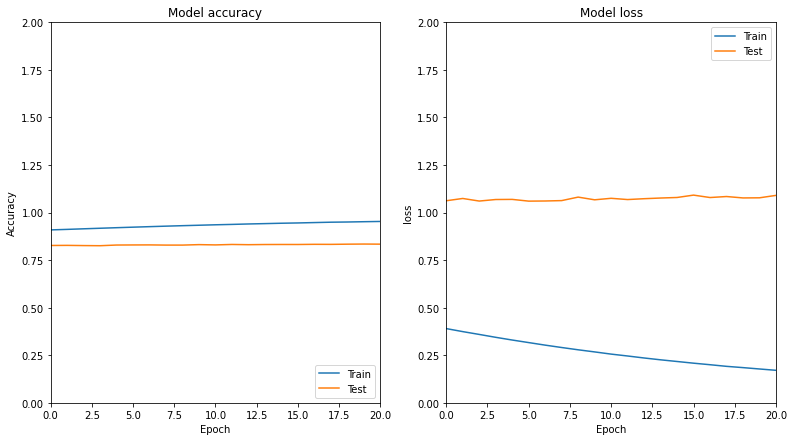

In [56]:
import matplotlib.pyplot as plt

# 훈련 과정 시각화 (정확도)
fig = plt.figure(figsize=(13, 7))
plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xlim(0, 20)
plt.ylim(0, 2)
plt.legend(['Train', 'Test' ], loc='lower right')
#plt.show()

# 훈련 과정 시각화 (손실)
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.xlim(0, 20)
plt.ylim(0, 2)
plt.legend(['Train', 'Test' ], loc='upper right')
plt.show()


# 번역기 테스트
    테스트 단계에서의 디코더의 동작 순서

1. 인코더에 입력 문장을 넣어 마지막 time step(sequence)의 hidden, cell state를 얻는다.
2. (sos) 토큰인 '<sos>'를 디코더에 입력한다.
3. 이전 time step의 출력층의 예측 결과를 현재 time step의 입력으로 한다.
4. 3을 반복하다가 (eos) 토큰인 '<eos>'이 예측되면 이를 중단한다.

In [57]:
#encoder_inputs와 encoder_states는 이미 정의한 것들을 재사용
encoder_model = Model(inputs = encoder_inputs, outputs = encoder_states)
encoder_model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding (Embedding)        (None, None, 256)         1195776   
_________________________________________________________________
masking (Masking)            (None, None, 256)         0         
_________________________________________________________________
lstm (LSTM)                  [(None, 256), (None, 256) 525312    
Total params: 1,721,088
Trainable params: 1,721,088
Non-trainable params: 0
_________________________________________________________________


## 디코더 입력층 설계

In [58]:
# 이전 time step의 hidden state를 저장하는 텐서
decoder_state_input_h = Input(shape=(256,))
# 이전 time step의 cell state를 저장하는 텐서
decoder_state_input_c = Input(shape=(256,))
# 이전 time step의 hidden state와 cell state를 하나의 변수에 저장
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

dec_emb2 = Embedding(fra_vocab_size, 256)(decoder_inputs)
# decoder_states_inputs를 현재 time step의 초기 상태로 사용.
# 구체적인 동작 자체는 def decode_sequence()에 구현.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state = decoder_states_inputs)
# 현재 time step의 hidden state와 cell state를 하나의 변수에 저장.
decoder_states2 = [state_h2, state_c2]

In [59]:
decoder_outputs2

<KerasTensor: shape=(None, None, 256) dtype=float32 (created by layer 'lstm_1')>

## 디코더 출력층 재설계

In [60]:
decoder_outputs2 = decoder_softmax_layer(decoder_outputs2)
decoder_model = Model(inputs=[decoder_inputs] + decoder_states_inputs, outputs=[decoder_outputs2] + decoder_states2)
decoder_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, None, 256)    1908480     input_2[0][0]                    
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, 256)]        0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 256)]        0                                            
____________________________________________________________________________________________

단어에서 정수로, 정수에서 단어로 바꾸는 사전(dictionary)

## 디코더의결과를 넣을 사전 생성

In [61]:
eng2idx = eng_tokenizer.word_index
fra2idx = fra_tokenizer.word_index
idx2eng = eng_tokenizer.index_word
idx2fra = fra_tokenizer.index_word

## 예측 과정을 위한 함수 decode_sequence()를 구현
    입력: 번역하고자하는 문장의 정수 시퀀스
    decode_sequence() 내부에는 인코더를 구현한 encoder_model이 있어서 이 모델에 번역하고자 하는 문장의 정수 시퀀스인 'input_seq'를 입력하면, encoder_model은 마지막 시점의 hidden state를 리턴

In [62]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    states_value = encoder_model.predict(input_seq)

    # 에 해당하는 원-핫 벡터 생성
    target_seq = np.zeros((1,1)) 
    target_seq[0, 0] = fra2idx['<sos>']
    
    stop_condition = False
    decoded_sentence = ""

    # stop_condition이 True가 될 때까지 루프 반복
    while not stop_condition:
        # 이점 시점의 상태 states_value를 현 시점의 초기 상태로 사용
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

        # 예측 결과를 문자로 변환
        # 각 문장별 (d0) 마지막행(d1)의 모든 열에서 max값 (벡터의 최고 유사도값)을 찾아 리턴
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = idx2fra[sampled_token_index]

        # 현재 시점의 예측 문자를 예측 문장에 추가
        decoded_sentence += ' '+sampled_char

        # 에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_char == '<eos>' or
           len(decoded_sentence) > max_fra_seq_len):
            stop_condition = True

        # 현재 시점의 예측 결과를 다음 시점의 입력으로 사용하기 위해 저장     
        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index

        # 현재 시점의 상태를 다음 시점의 상태로 사용하기 위해 저장
        states_value = [h, c]

    return decoded_sentence

In [63]:
print(type(fra2idx))
print(len(fra2idx))

<class 'dict'>
7454


In [64]:
fra_vocab_size

7455

In [65]:
fra2idx['<sos>']

1

In [66]:
fra2idx

{'<sos>': 1,
 '<eos>': 2,
 '.': 3,
 'je': 4,
 'est': 5,
 '?': 6,
 'tom': 7,
 '!': 8,
 'a': 9,
 'vous': 10,
 'j': 11,
 'pas': 12,
 'il': 13,
 'le': 14,
 'ai': 15,
 'de': 16,
 'nous': 17,
 'l': 18,
 'c': 19,
 'ne': 20,
 'suis': 21,
 'tu': 22,
 'd': 23,
 's': 24,
 'un': 25,
 't': 26,
 'la': 27,
 'en': 28,
 'n': 29,
 'ce': 30,
 'me': 31,
 'tes': 32,
 'es': 33,
 'une': 34,
 'que': 35,
 'les': 36,
 'm': 37,
 'e': 38,
 'moi': 39,
 'te': 40,
 'elle': 41,
 ',': 42,
 'tait': 43,
 'sont': 44,
 'ils': 45,
 'y': 46,
 'sommes': 47,
 'fait': 48,
 'r': 49,
 'tout': 50,
 'elles': 51,
 'qui': 52,
 'des': 53,
 'mon': 54,
 'aime': 55,
 're': 56,
 'toi': 57,
 'bien': 58,
 'as': 59,
 'ici': 60,
 'tr': 61,
 'pr': 62,
 'se': 63,
 'arr': 64,
 'du': 65,
 'on': 66,
 'besoin': 67,
 'air': 68,
 'faire': 69,
 'avez': 70,
 'peux': 71,
 'avons': 72,
 'ont': 73,
 'cela': 74,
 'personne': 75,
 'va': 76,
 'veux': 77,
 'votre': 78,
 'qu': 79,
 'tais': 80,
 'fais': 81,
 'tre': 82,
 'ma': 83,
 'ton': 84,
 'faut': 85,
 'com

## 출력결과 테스트

In [67]:
for seq_index in [500,50,200,330,1001]: # 입력 문장의 인덱스 (자유롭게 선택해 보세요)
    input_seq = encoder_input[seq_index: seq_index + 1]
    decoded_sentence = decode_sequence(input_seq)
    print(35 * "-")
    print('입력 문장:', lines.eng[seq_index])
    print('정답 문장:', lines.fra[seq_index][1:len(lines.fra[seq_index])-1]) # '<sos>'와 '<eos> '을 빼고 출력
    print('번역기가 번역한 문장:', decoded_sentence[:len(decoded_sentence)-1]) # '<eos>'을 빼고 출력

-----------------------------------
입력 문장: ['get', 'away', '!']
정답 문장: ['criss', 'ton', 'camp', 'd', 'icit', '!']
번역기가 번역한 문장:  d l ! ! ! . . . 
-----------------------------------
입력 문장: ['hello', '!']
정답 문장: ['bonjour', '!']
번역기가 번역한 문장:  bonjour ! ! ! ! 
-----------------------------------
입력 문장: ['bury', 'it', '.']
정답 문장: ['enterre', 'le', '.']
번역기가 번역한 문장:  riche riche . . 
-----------------------------------
입력 문장: ['i', 'snore', '.']
정답 문장: ['je', 'ronfle', '.']
번역기가 번역한 문장:  je je . . . . . 
-----------------------------------
입력 문장: ['here', 's', '.']
정답 문장: ['voil', 'cinq', 'dollars', '.']
번역기가 번역한 문장:  voici cinq est . 


# 회고

    1. 단어수준의 번역기를 어렵게 수행은 하였으나 성능이 그다지 좋지 못하며,,, 생각거리를 많이줌 
    2. 정규화이후 list형식으로 반환을 받아 <sos>, <eos>생성시 typeError가 발생, 정규화함수에 포함하여 같이 수행
    3.  (batchsize= 256, epoch=30)모델 val_acc값이 줄어들다 epoch 10 이후부터  소폭 증가하고 있음, 그에 반해 acc는 train/test모두 일정수준을 유지함.
    4.  (batchsize= 512, epoch=50)모델 val_loss값이 소폭 증가하는 추세로 바뀜.
        
       
    (batchsize= 256, epoch=30)
        -----------------------------------
    입력 문장: ['get', 'away', '!']
    정답 문장: ['criss', 'ton', 'camp', 'd', 'icit', '!']
    번역기가 번역한 문장:  tez ci . . . tez te  / 한국어번역: 자, 자, 자, 자, 자, 자
    -----------------------------------
    입력 문장: ['hello', '!']
    정답 문장: ['bonjour', '!']
    번역기가 번역한 문장:  tez tez tez tez te / 한국어번역: 시험해 보세요.
    -----------------------------------
    입력 문장: ['bury', 'it', '.']
    정답 문장: ['enterre', 'le', '.']
    번역기가 번역한 문장:  tez boulot . . . / 한국어번역: 일거리
    -----------------------------------
    입력 문장: ['i', 'snore', '.']
    정답 문장: ['je', 'ronfle', '.']
    번역기가 번역한 문장:  tez au . partir parti / 한국어번역: 떠나다오
    -----------------------------------
    입력 문장: ['here', 's', '.']
    정답 문장: ['voil', 'cinq', 'dollars', '.']
    번역기가 번역한 문장:  ici ici allez jou /  한국어번역: 자, 자, 이리 와봐
    
    
    (batchsize= 512, epoch=50)
    -----------------------------------
    입력 문장: ['get', 'away', '!']
    정답 문장: ['criss', 'ton', 'camp', 'd', 'icit', '!']
    번역기가 번역한 문장:  d l ! ! ! . . . 
    -----------------------------------
    입력 문장: ['hello', '!']
    정답 문장: ['bonjour', '!']
    번역기가 번역한 문장:  bonjour ! ! ! !  / 안녕!
    -----------------------------------
    입력 문장: ['bury', 'it', '.']
    정답 문장: ['enterre', 'le', '.']
    번역기가 번역한 문장:  riche riche . .  /돈 많은 사람
    -----------------------------------
    입력 문장: ['i', 'snore', '.']
    정답 문장: ['je', 'ronfle', '.']
    번역기가 번역한 문장:  je je . . . . .  /나는...
    -----------------------------------
    입력 문장: ['here', 's', '.']
    정답 문장: ['voil', 'cinq', 'dollars', '.']
    번역기가 번역한 문장:  voici cinq est .  / 여기 동쪽이 다섯이다

    